In [2]:
# creation of a simple regression model with the mean of each variable in datasets_3h folder
# and the mean of the target variable in the training set

import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import shap
from sklearn.inspection import permutation_importance

op ='mac'
if op == 'win':
    path = f'~/OneDrive/Documents/GitHub/master-project/'
else:
    path = f'~/Documents/GitHub/master-project/'

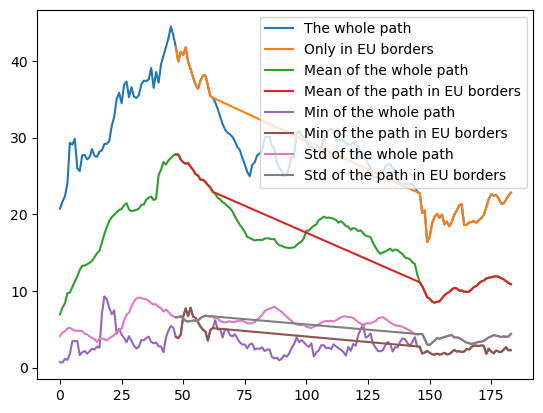

In [11]:
#one_storm = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/instantaneous_10m_wind_gust/storm_1/max_1_0.csv')

one_storm_pd = pd.read_csv(path+'/datasets_1h/instantaneous_10m_wind_gust/storm_1/max_1_0.csv')
one_storm_EU_pd = pd.read_csv(path+'/datasets_1h_EU/instantaneous_10m_wind_gust/storm_1/max_1_0.csv')
one_storm_mean = pd.read_csv(path+'/datasets_1h/instantaneous_10m_wind_gust/storm_1/mean_1_0.csv')
one_storm_EU_mean = pd.read_csv(path+'/datasets_1h_EU/instantaneous_10m_wind_gust/storm_1/mean_1_0.csv')
one_storm_min = pd.read_csv(path+'/datasets_1h/instantaneous_10m_wind_gust/storm_1/min_1_0.csv')
one_storm_EU_min = pd.read_csv(path+'/datasets_1h_EU/instantaneous_10m_wind_gust/storm_1/min_1_0.csv')
one_storm_std = pd.read_csv(path+'/datasets_1h/instantaneous_10m_wind_gust/storm_1/std_1_0.csv')
one_storm_EU_std = pd.read_csv(path+'/datasets_1h_EU/instantaneous_10m_wind_gust/storm_1/std_1_0.csv')

one_storm = np.asarray(one_storm_pd['0'])
one_storm_EU = np.asarray(one_storm_EU_pd['0'])
plt.plot(one_storm_pd['Unnamed: 0'], one_storm,label='The whole path')#, lw=0, marker='o')
plt.plot(one_storm_EU_pd['Unnamed: 0'],one_storm_EU, label='Only in EU borders')#, lw=0, marker='o')
plt.plot(one_storm_mean['Unnamed: 0'], one_storm_mean['0'], label='Mean of the whole path')
plt.plot(one_storm_EU_mean['Unnamed: 0'], one_storm_EU_mean['0'], label='Mean of the path in EU borders')
plt.plot(one_storm_min['Unnamed: 0'], one_storm_min['0'], label='Min of the whole path')
plt.plot(one_storm_EU_min['Unnamed: 0'], one_storm_EU_min['0'], label='Min of the path in EU borders')
plt.plot(one_storm_std['Unnamed: 0'], one_storm_std['0'], label='Std of the whole path')
plt.plot(one_storm_EU_std['Unnamed: 0'], one_storm_EU_std['0'], label='Std of the path in EU borders')
plt.legend()

In [3]:
'''# test 2

# open each csv file and read it into a pandas dataframe
name_of_variables = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/variable_list_24_v2_1.csv')
name_of_variables = name_of_variables['variable'].tolist()

# Create a new list of variables
new_name_of_variables = []
for variable in name_of_variables:
    if variable == 'geopotential':
        new_name_of_variables.extend(['geopotential_500', 'geopotential_1000'])
    else:
        new_name_of_variables.append(variable)

# Iterate over the new list of variables
for i in range(0, len(new_name_of_variables)):

    print(new_name_of_variables[i])

    locals()[f'max_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'min_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'mean_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'sigma_{new_name_of_variables[i]}'] = pd.DataFrame()

    for j in range (1,96+1):
        if 'geopotential' in new_name_of_variables[i]:
            for k in [500, 1000]:
                df_max_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/max_'+ str(j) + '_' + str(k) + '.csv')
                df_min_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/min_'+ str(j) + '_' + str(k) + '.csv')
                df_mean_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/mean_'+ str(j) + '_' + str(k) + '.csv')
                df_sigma_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/std_'+ str(j) + '_' + str(k) + '.csv')

        else:
            df_max_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/max_'+ str(j) + '_0.csv')
            df_min_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/min_'+ str(j) + '_0.csv')
            df_mean_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/mean_'+ str(j) + '_0.csv')
            df_sigma_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/std_'+ str(j) + '_0.csv')

        df_max_temp = df_max_temp.drop(columns = ['Unnamed: 0'])
        df_min_temp = df_min_temp.drop(columns = ['Unnamed: 0'])
        df_mean_temp = df_mean_temp.drop(columns = ['Unnamed: 0'])
        df_sigma_temp = df_sigma_temp.drop(columns = ['Unnamed: 0'])

        locals()[f'max_{new_name_of_variables[i]}'] = pd.concat([locals()[f'max_{new_name_of_variables[i]}'], df_max_temp], axis=0)
        locals()[f'min_{new_name_of_variables[i]}'] = pd.concat([locals()[f'min_{new_name_of_variables[i]}'], df_min_temp], axis=0)
        locals()[f'mean_{new_name_of_variables[i]}'] = pd.concat([locals()[f'mean_{new_name_of_variables[i]}'], df_mean_temp], axis=0)
        locals()[f'sigma_{new_name_of_variables[i]}'] = pd.concat([locals()[f'sigma_{new_name_of_variables[i]}'], df_sigma_temp], axis=0)'''

"# test 2\n\n# open each csv file and read it into a pandas dataframe\nname_of_variables = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/variable_list_24_v2_1.csv')\nname_of_variables = name_of_variables['variable'].tolist()\n\n# Create a new list of variables\nnew_name_of_variables = []\nfor variable in name_of_variables:\n    if variable == 'geopotential':\n        new_name_of_variables.extend(['geopotential_500', 'geopotential_1000'])\n    else:\n        new_name_of_variables.append(variable)\n\n# Iterate over the new list of variables\nfor i in range(0, len(new_name_of_variables)):\n\n    print(new_name_of_variables[i])\n\n    locals()[f'max_{new_name_of_variables[i]}'] = pd.DataFrame()\n    locals()[f'min_{new_name_of_variables[i]}'] = pd.DataFrame()\n    locals()[f'mean_{new_name_of_variables[i]}'] = pd.DataFrame()\n    locals()[f'sigma_{new_name_of_variables[i]}'] = pd.DataFrame()\n\n    for j in range (1,96+1):\n        if 'geopotential' in new_name_of_va

In [6]:
# to separate each storm into one column : 

# open each csv file and read it into a pandas dataframe

name_of_variables = pd.read_csv(path+'/variable_list_24_v2_1.csv')
name_of_variables = name_of_variables['variable'].tolist()

# which dataset to use 

dataset = 'datasets_3h_EU'

# Create a new list of variables
new_name_of_variables = []
for variable in name_of_variables:
    if variable == 'geopotential':
        new_name_of_variables.extend(['geopotential_500', 'geopotential_1000'])
    else:
        new_name_of_variables.append(variable)

# Iterate over the new list of variables
for i in range(0, len(new_name_of_variables)):

    print(new_name_of_variables[i])

    locals()[f'max_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'min_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'mean_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'sigma_{new_name_of_variables[i]}'] = pd.DataFrame()

    for j in range (1,95+1):
        try :
            if 'geopotential' in new_name_of_variables[i]:
                continue
                for k in [500, 1000]:
                    df_max_temp = pd.read_csv(path+dataset+'/geopotential/storm_' + str(j) + '/max_'+ str(j) + '_' + str(k) + '.csv')
                    df_min_temp = pd.read_csv(path+dataset+'/geopotential/storm_' + str(j) + '/min_'+ str(j) + '_' + str(k) + '.csv')
                    df_mean_temp = pd.read_csv(path+dataset+'/geopotential/storm_' + str(j) + '/mean_'+ str(j) + '_' + str(k) + '.csv')
                    df_sigma_temp = pd.read_csv(path+dataset+'/geopotential/storm_' + str(j) + '/std_'+ str(j) + '_' + str(k) + '.csv')

            else:
                df_max_temp = pd.read_csv(path+dataset+'/' + new_name_of_variables[i] + '/storm_' + str(j) + '/max_'+ str(j) + '_0.csv')
                df_min_temp = pd.read_csv(path+dataset+'/' + new_name_of_variables[i] + '/storm_' + str(j) + '/min_'+ str(j) + '_0.csv')
                df_mean_temp = pd.read_csv(path+dataset+'/' + new_name_of_variables[i] + '/storm_' + str(j) + '/mean_'+ str(j) + '_0.csv')
                df_sigma_temp = pd.read_csv(path+dataset+'/' + new_name_of_variables[i] + '/storm_' + str(j) + '/std_'+ str(j) + '_0.csv')
        except FileNotFoundError:
            print(f"Fichier pour la tempête {j} et la variable {new_name_of_variables[i]} non trouvé.")
            continue

        df_max_temp = df_max_temp.drop(columns = ['Unnamed: 0'])
        df_min_temp = df_min_temp.drop(columns = ['Unnamed: 0'])
        df_mean_temp = df_mean_temp.drop(columns = ['Unnamed: 0'])
        df_sigma_temp = df_sigma_temp.drop(columns = ['Unnamed: 0'])

        df_max_temp = df_max_temp.rename(columns = {'0': f'storm_{j}'})
        df_min_temp = df_min_temp.rename(columns = {'0': f'storm_{j}'})
        df_mean_temp = df_mean_temp.rename(columns = {'0': f'storm_{j}'})
        df_sigma_temp = df_sigma_temp.rename(columns = {'0': f'storm_{j}'})

        locals()[f'max_{new_name_of_variables[i]}']= pd.concat([locals()[f'max_{new_name_of_variables[i]}'] ,df_max_temp], axis=1)#[f'storm_{j}'] = df_max_temp['0']
        locals()[f'min_{new_name_of_variables[i]}']= pd.concat([locals()[f'min_{new_name_of_variables[i]}'], df_min_temp], axis=1)#[f'storm_{j}'] = df_min_temp['0']# = pd.concat([locals()[f'min_{new_name_of_variables[i]}'], df_min_temp], axis=0)
        locals()[f'mean_{new_name_of_variables[i]}']= pd.concat([locals()[f'mean_{new_name_of_variables[i]}'], df_mean_temp], axis=1)#[f'storm_{j}'] = df_mean_temp['0'] #= pd.concat([locals()[f'mean_{new_name_of_variables[i]}'], df_mean_temp], axis=0)
        locals()[f'sigma_{new_name_of_variables[i]}']= pd.concat([locals()[f'sigma_{new_name_of_variables[i]}'], df_sigma_temp], axis=1)#[f'storm_{j}'] = df_sigma_temp['0'] #= pd.concat([locals()[f'sigma_{new_name_of_variables[i]}'], df_sigma_temp], axis=0)

for k in [500, 1000]:
    locals()[f'max_geopotential_{k}'] = pd.DataFrame()
    locals()[f'min_geopotential_{k}'] = pd.DataFrame()
    locals()[f'mean_geopotential_{k}'] = pd.DataFrame()
    locals()[f'sigma_geopotential_{k}'] = pd.DataFrame()
    for j in range (1,95+1):
        try :
            df_max_temp = pd.read_csv(path+dataset+'/geopotential/storm_' + str(j) + '/max_'+ str(j) + '_' + str(k) + '.csv')
            df_min_temp = pd.read_csv(path+dataset+'/geopotential/storm_' + str(j) + '/min_'+ str(j) + '_' + str(k) + '.csv')
            df_mean_temp = pd.read_csv(path+dataset+'/geopotential/storm_' + str(j) + '/mean_'+ str(j) + '_' + str(k) + '.csv')
            df_sigma_temp = pd.read_csv(path+dataset+'/geopotential/storm_' + str(j) + '/std_'+ str(j) + '_' + str(k) + '.csv')
        except FileNotFoundError:
            print(f"Fichier pour la tempête {j} et la variable geopotential_{k} non trouvé.")
            continue

        df_max_temp = df_max_temp.drop(columns = ['Unnamed: 0'])
        df_min_temp = df_min_temp.drop(columns = ['Unnamed: 0'])
        df_mean_temp = df_mean_temp.drop(columns = ['Unnamed: 0'])
        df_sigma_temp = df_sigma_temp.drop(columns = ['Unnamed: 0'])

        df_max_temp = df_max_temp.rename(columns = {'0': f'storm_{j}'})
        df_min_temp = df_min_temp.rename(columns = {'0': f'storm_{j}'})
        df_mean_temp = df_mean_temp.rename(columns = {'0': f'storm_{j}'})
        df_sigma_temp = df_sigma_temp.rename(columns = {'0': f'storm_{j}'})

        locals()[f'max_geopotential_{k}'] = pd.concat([locals()[f'mean_{new_name_of_variables[i]}'], df_min_temp], axis=1)#[f'storm_{j}'] = df_max_temp['0']
        locals()[f'min_geopotential_{k}'] = pd.concat([locals()[f'min_{new_name_of_variables[i]}'], df_min_temp], axis=1)#[f'storm_{j}'] = df_min_temp['0']# = pd.concat([locals()[f'min_{new_name_of_variables[i]}'], df_min_temp], axis=0)
        locals()[f'mean_geopotential_{k}'] = pd.concat([locals()[f'mean_{new_name_of_variables[i]}'], df_mean_temp], axis=1)#[f'storm_{j}'] = df_mean_temp['0'] #= pd.concat([locals()[f'mean_{new_name_of_variables[i]}'], df_mean_temp], axis=0)
        locals()[f'sigma_geopotential_{k}'] = pd.concat([locals()[f'mean_{new_name_of_variables[i]}'], df_sigma_temp], axis=1)#[f'storm_{j}'] = df_sigma_temp['0']


10m_u_component_of_wind
Fichier pour la tempête 91 et la variable 10m_u_component_of_wind non trouvé.
10m_v_component_of_wind
Fichier pour la tempête 91 et la variable 10m_v_component_of_wind non trouvé.
2m_dewpoint_temperature
Fichier pour la tempête 91 et la variable 2m_dewpoint_temperature non trouvé.
2m_temperature
Fichier pour la tempête 91 et la variable 2m_temperature non trouvé.
cloud_base_height
Fichier pour la tempête 91 et la variable cloud_base_height non trouvé.
convective_available_potential_energy
Fichier pour la tempête 91 et la variable convective_available_potential_energy non trouvé.
convective_inhibition
Fichier pour la tempête 91 et la variable convective_inhibition non trouvé.
convective_precipitation
Fichier pour la tempête 91 et la variable convective_precipitation non trouvé.
convective_rain_rate
Fichier pour la tempête 91 et la variable convective_rain_rate non trouvé.
convective_snowfall
Fichier pour la tempête 91 et la variable convective_snowfall non trouvé

In [5]:
'''def process_storm_data(variable_list_path, data_folder_path):
    # Read the list of variables
    name_of_variables = pd.read_csv(variable_list_path)
    name_of_variables = name_of_variables['variable'].tolist()

    # Create a new list of variables
    new_name_of_variables = []
    for variable in name_of_variables:
        if variable == 'geopotential':
            new_name_of_variables.extend(['geopotential_500', 'geopotential_1000'])
        else:
            new_name_of_variables.append(variable)

    # Create dictionaries to hold the DataFrames
    max_dfs = {}
    min_dfs = {}
    mean_dfs = {}
    sigma_dfs = {}

    # Iterate over the new list of variables
    for var in new_name_of_variables:
        max_dfs[var] = pd.DataFrame()
        min_dfs[var] = pd.DataFrame()
        mean_dfs[var] = pd.DataFrame()
        sigma_dfs[var] = pd.DataFrame()

        for storm_num in range(1, 97):
            if 'geopotential' in var:
                continue  # Skipped to be handled later
            else:
                file_suffix = '0'
                paths = {
                    'max': f'{data_folder_path}/{var}/storm_{storm_num}/max_{storm_num}_{file_suffix}.csv',
                    'min': f'{data_folder_path}/{var}/storm_{storm_num}/min_{storm_num}_{file_suffix}.csv',
                    'mean': f'{data_folder_path}/{var}/storm_{storm_num}/mean_{storm_num}_{file_suffix}.csv',
                    'sigma': f'{data_folder_path}/{var}/storm_{storm_num}/std_{storm_num}_{file_suffix}.csv'
                }

                df_max_temp = pd.read_csv(paths['max']).drop(columns=['Unnamed: 0'])
                df_min_temp = pd.read_csv(paths['min']).drop(columns=['Unnamed: 0'])
                df_mean_temp = pd.read_csv(paths['mean']).drop(columns=['Unnamed: 0'])
                df_sigma_temp = pd.read_csv(paths['sigma']).drop(columns=['Unnamed: 0'])

                max_dfs[var][f'storm_{storm_num}'] = df_max_temp['0']
                min_dfs[var][f'storm_{storm_num}'] = df_min_temp['0']
                mean_dfs[var][f'storm_{storm_num}'] = df_mean_temp['0']
                sigma_dfs[var][f'storm_{storm_num}'] = df_sigma_temp['0']

    for level in [500, 1000]:
        var = f'geopotential_{level}'
        max_dfs[var] = pd.DataFrame()
        min_dfs[var] = pd.DataFrame()
        mean_dfs[var] = pd.DataFrame()
        sigma_dfs[var] = pd.DataFrame()

        for storm_num in range(1, 97):
            paths = {
                'max': f'{data_folder_path}/geopotential/storm_{storm_num}/max_{storm_num}_{level}.csv',
                'min': f'{data_folder_path}/geopotential/storm_{storm_num}/min_{storm_num}_{level}.csv',
                'mean': f'{data_folder_path}/geopotential/storm_{storm_num}/mean_{storm_num}_{level}.csv',
                'sigma': f'{data_folder_path}/geopotential/storm_{storm_num}/std_{storm_num}_{level}.csv'
            }

            df_max_temp = pd.read_csv(paths['max']).drop(columns=['Unnamed: 0'])
            df_min_temp = pd.read_csv(paths['min']).drop(columns=['Unnamed: 0'])
            df_mean_temp = pd.read_csv(paths['mean']).drop(columns=['Unnamed: 0'])
            df_sigma_temp = pd.read_csv(paths['sigma']).drop(columns=['Unnamed: 0'])

            max_dfs[var][f'storm_{storm_num}'] = df_max_temp['0']
            min_dfs[var][f'storm_{storm_num}'] = df_min_temp['0']
            mean_dfs[var][f'storm_{storm_num}'] = df_mean_temp['0']
            sigma_dfs[var][f'storm_{storm_num}'] = df_sigma_temp['0']

    return max_dfs, min_dfs, mean_dfs, sigma_dfs

# Example usage:
variable_list_path = '/Users/fabienaugsburger/Documents/GitHub/master-project/variable_list_24_v2_1.csv'
data_folder_path = '/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h'
max_dfs, min_dfs, mean_dfs, sigma_dfs = process_storm_data(variable_list_path, data_folder_path)

name_of_variables = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/variable_list_24_v2_1.csv')
name_of_variables = name_of_variables['variable'].tolist()

new_name_of_variables = []
for variable in name_of_variables:
        if variable == 'geopotential':
            new_name_of_variables.extend(['geopotential_500', 'geopotential_1000'])
        else:
            new_name_of_variables.append(variable)'''

"def process_storm_data(variable_list_path, data_folder_path):\n    # Read the list of variables\n    name_of_variables = pd.read_csv(variable_list_path)\n    name_of_variables = name_of_variables['variable'].tolist()\n\n    # Create a new list of variables\n    new_name_of_variables = []\n    for variable in name_of_variables:\n        if variable == 'geopotential':\n            new_name_of_variables.extend(['geopotential_500', 'geopotential_1000'])\n        else:\n            new_name_of_variables.append(variable)\n\n    # Create dictionaries to hold the DataFrames\n    max_dfs = {}\n    min_dfs = {}\n    mean_dfs = {}\n    sigma_dfs = {}\n\n    # Iterate over the new list of variables\n    for var in new_name_of_variables:\n        max_dfs[var] = pd.DataFrame()\n        min_dfs[var] = pd.DataFrame()\n        mean_dfs[var] = pd.DataFrame()\n        sigma_dfs[var] = pd.DataFrame()\n\n        for storm_num in range(1, 97):\n            if 'geopotential' in var:\n                continu

In [6]:

'''
# remove variable with only one repetitive value in each statistic
for i in range (0, len(name_of_variables)):
    var_name = name_of_variables[i]
    for stat in ['max', 'min', 'mean', 'sigma']:
        df = locals()[f'{stat}_{var_name}']
        cols_to_drop = [col for col in df.columns if df[col].nunique() <= 1]
        locals()[f'{stat}_{var_name}'] = df.drop(columns=cols_to_drop)

# drop nan values and remove empty dataframes
kept_variables = []
for i in range (0, len(name_of_variables)):
    var_name = name_of_variables[i]
    for stat in ['max', 'min', 'mean', 'sigma']:
        df = locals()[f'{stat}_{var_name}']
        df = df.dropna()
        if not df.empty:
            locals()[f'{stat}_{var_name}'] = df
            if var_name not in kept_variables:
                kept_variables.append(var_name)
        else:
            del locals()[f'{stat}_{var_name}']

del max_high_cloud_cover
del min_high_cloud_cover

# update name_of_variables to only include kept variables
name_of_variables = pd.Series(kept_variables)'''

"\n# remove variable with only one repetitive value in each statistic\nfor i in range (0, len(name_of_variables)):\n    var_name = name_of_variables[i]\n    for stat in ['max', 'min', 'mean', 'sigma']:\n        df = locals()[f'{stat}_{var_name}']\n        cols_to_drop = [col for col in df.columns if df[col].nunique() <= 1]\n        locals()[f'{stat}_{var_name}'] = df.drop(columns=cols_to_drop)\n\n# drop nan values and remove empty dataframes\nkept_variables = []\nfor i in range (0, len(name_of_variables)):\n    var_name = name_of_variables[i]\n    for stat in ['max', 'min', 'mean', 'sigma']:\n        df = locals()[f'{stat}_{var_name}']\n        df = df.dropna()\n        if not df.empty:\n            locals()[f'{stat}_{var_name}'] = df\n            if var_name not in kept_variables:\n                kept_variables.append(var_name)\n        else:\n            del locals()[f'{stat}_{var_name}']\n\ndel max_high_cloud_cover\ndel min_high_cloud_cover\n\n# update name_of_variables to only inc

In [7]:
# the target variable is the mean of instanteneous_10m_wind_gust
#variable_w_high_corr= ['mean_large_scale_precipitation','mean_total_precipitation','mean_mean_large_scale_precipitation_rate','mean_large_scale_snowfall']
#mean_large_scale_precipitation

# mean_low_tropospheric_vertical_velocity??
# create a dataframe with the target variable

#target_variable = mean_instantaneous_10m_wind_gust
'''x_variable = mean_total_precipitation

# split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(x_variable, target_variable, test_size=0.2, random_state=42)'''

'x_variable = mean_total_precipitation\n\n# split the data into a training and a test set\nX_train, X_test, y_train, y_test = train_test_split(x_variable, target_variable, test_size=0.2, random_state=42)'

In [24]:
# store the mean_large_scale_precipitation in a df, set the name as the header of the column and so the same with mean_total_precipitation

def setup_seed(seed):
    random.seed(seed)
    np.random.seed(seed)                       
setup_seed(42)

number_test_storms = round(96*0.3)
test_storm_index = random.sample(range(96), number_test_storms)
number_validation_storms = round(number_test_storms*1/3)
validation_storm_index = random.sample(test_storm_index, number_validation_storms)

## for later, pick defined storms for test and validation set rather than random but ranbdomized the seed to have a different random selection

# order the index of the test_storm_index and validation_storm_index
test_storm_index.sort()
validation_storm_index.sort()

# remove the index of the validation storms from the test_storm_index
'''for i in range(0, len(validation_storm_index)):
    test_storm_index.remove(validation_storm_index[i])'''

# check the number of storms in each set
print(len(test_storm_index))
print(len(validation_storm_index))

# create the training, validation and test set
X_train = pd.DataFrame()
X_validation = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.DataFrame()
y_validation = pd.DataFrame()
y_test = pd.DataFrame()

if 'instantaneous_10m_wind_gust' in new_name_of_variables:
    new_name_of_variables.remove('instantaneous_10m_wind_gust')

for x_var in new_name_of_variables: 
    for storm_number in locals()[f'mean_{x_var}'].columns:
        modified_storm_number = f"{x_var}_{storm_number}"
        if int(storm_number.split('_')[1]) in test_storm_index:
            if int(storm_number.split('_')[1]) in validation_storm_index:
                X_validation = pd.concat([X_validation, locals()[f'mean_{x_var}'][storm_number]], axis=1) # [storm_number]
                X_validation = X_validation.rename(columns={storm_number: modified_storm_number})
                #y_validation = pd.concat([y_validation, mean_instantaneous_10m_wind_gust[storm_number]], axis=1)
            else:
                X_test = pd.concat([X_test, locals()[f'mean_{x_var}'][storm_number]], axis=1)
                X_test = X_test.rename(columns={storm_number: modified_storm_number})
                #y_test = pd.concat([y_test, locals()[f'mean_instantaneous_10m_wind_gust'][storm_number]], axis=1)
        else:
            X_train = pd.concat([X_train, locals()[f'mean_{x_var}'][storm_number]], axis=1)
            X_train = X_train.rename(columns={storm_number: modified_storm_number})
            #y_train = pd.concat([y_train, locals()[f'mean_instantaneous_10m_wind_gust'][storm_number]], axis=1)

for storm_number in mean_instantaneous_10m_wind_gust.columns:
    modified_storm_number = f"mean_instantaneous_10m_wind_gust_{storm_number}"
    if int(storm_number.split('_')[1]) in test_storm_index:
        if int(storm_number.split('_')[1]) in validation_storm_index:
            y_validation = pd.concat([y_validation, mean_instantaneous_10m_wind_gust[storm_number]], axis=1)
            y_validation = y_validation.rename(columns={storm_number: modified_storm_number})
        else:
            y_test = pd.concat([y_test, mean_instantaneous_10m_wind_gust[storm_number]], axis=1)
            y_test = y_test.rename(columns={storm_number: modified_storm_number})
    else:
        y_train = pd.concat([y_train, mean_instantaneous_10m_wind_gust[storm_number]], axis=1)
        y_train = y_train.rename(columns={storm_number: modified_storm_number})


'''df = mean_large_scale_precipitation
df = df.rename(columns={'0':'mean_large_scale_precipitation'})
#df['mean_large_scale_precipitation'] = mean_large_scale_precipitation
df['mean_total_precipitation'] = mean_total_precipitation
df['mean_mean_large_scale_precipitation_rate'] = mean_mean_large_scale_precipitation_rate
df['mean_large_scale_snowfall'] = mean_large_scale_snowfall
'''

29
10


"df = mean_large_scale_precipitation\ndf = df.rename(columns={'0':'mean_large_scale_precipitation'})\n#df['mean_large_scale_precipitation'] = mean_large_scale_precipitation\ndf['mean_total_precipitation'] = mean_total_precipitation\ndf['mean_mean_large_scale_precipitation_rate'] = mean_mean_large_scale_precipitation_rate\ndf['mean_large_scale_snowfall'] = mean_large_scale_snowfall\n"

In [25]:
def combine_columns(df):
    # Extract variable names from column names
    columns_info = [col.rsplit('_', 2) for col in df.columns]
    
    # Create a dictionary to hold grouped columns
    grouped_columns = {}
    for var, unit, storm in columns_info:
        variable_name = f"{var}"#_{unit}"
        if variable_name not in grouped_columns:
            grouped_columns[variable_name] = []
        grouped_columns[variable_name].append(f"{var}_{unit}_{storm}")
    
    # Create a new dataframe to hold the combined columns
    combined_df = pd.DataFrame()
    
    for variable, cols in grouped_columns.items():
        # Combine the columns for each variable
        combined_variable_df = pd.concat([df[col] for col in cols], ignore_index=True) #.dropna()
        combined_df[variable] = combined_variable_df
        #combined_df = combined_df.dropna(axis=0, how='any')
    
    return combined_df

# Example usage
'''data = {
    '2m_dewpoint_temperature_storm_1': [1, 2, None, 4],
    '2m_dewpoint_temperature_storm_2': [None, 5, 6, None],
    '2m_dewpoint_temperature_storm_3': [7, None, 9, 10],
    'other_variable_storm_1': [10, 20, 30, 40],
    'other_variable_storm_2': [None, 25, 35, None],
}

df = pd.DataFrame(data)'''
'''combined_df = combine_columns(df)
print(combined_df)'''

'combined_df = combine_columns(df)\nprint(combined_df)'

In [33]:
#target_variable = mean_instantaneous_10m_wind_gust


'''X_train_reshape = X_train.values.reshape((X_train.shape[0], X_train.shape[1]))
X_test_reshape = X_test.values.reshape((X_test.shape[0], X_test.shape[1]))
y_train_reshape = y_train.values.reshape((y_train.shape[0], y_train.shape[1]))
y_test_reshape = y_test.values.reshape((y_test.shape[0], y_test.shape[1]))'''

# reshape all X and y such as the shape is (all the storms, all the variables)
# Merge the columns

X_train_new= combine_columns(X_train)
X_test_new= combine_columns(X_test)
X_validation_new= combine_columns(X_validation)

y_train_new= combine_columns(y_train)
y_test_new= combine_columns(y_test)
y_validation_new= combine_columns(y_validation)

# drop the convective inhibition and cloud_base_height
X_train_new = X_train_new.drop(columns = ['convective_inhibition','cloud_base_height'])
X_test_new = X_test_new.drop(columns = ['convective_inhibition','cloud_base_height'])
X_validation_new = X_validation_new.drop(columns = ['convective_inhibition','cloud_base_height'])
new_name_of_variables.remove('convective_inhibition')
new_name_of_variables.remove('cloud_base_height')

In [36]:
import xarray as xr
dg = xr.open_dataset(f"C:/Users/fabau/Downloads/ERA5_1990-11_convective_inhibition.nc")

# plot the cin values

cin = dg['cin']
cin = cin.mean(dim=['latitude', 'longitude'])
cin = cin.to_dataframe()
cin = cin.reset_index()


In [34]:
# drop nan values by merging the X and y

def drop_nan(X, y):
    X['target'] = y
    X = X.dropna()
    y = X['target']
    X = X.drop(columns = ['target'])
    return X, y

X_train_new, y_train_new = drop_nan(X_train_new, y_train_new)
X_test_new, y_test_new = drop_nan(X_test_new, y_test_new)
X_validation_new, y_validation_new = drop_nan(X_validation_new, y_validation_new)

'''X_train_new['target'] = y_train_new
X_train_new = X_train_new.dropna()
y_train_new = X_train_new['target']
X_train_new = X_train_new.drop(columns = ['target'])

X_test_new['target'] = y_test_new
X_test_new = X_test_new.dropna()
y_test_new = X_test_new['target']
X_test_new = X_test_new.drop(columns = ['target'])

X_validation_new['target'] = y_validation_new
X_validation_new = X_validation_new.dropna()
y_validation_new = X_validation_new['target']
X_validation_new = X_validation_new.drop(columns = ['target'])

# check the shape of the new X and y
print(X_train_new.shape, y_train_new.shape)
print(X_test_new.shape, y_test_new.shape)
print(X_validation_new.shape, y_validation_new.shape)'''

"X_train_new['target'] = y_train_new\nX_train_new = X_train_new.dropna()\ny_train_new = X_train_new['target']\nX_train_new = X_train_new.drop(columns = ['target'])\n\nX_test_new['target'] = y_test_new\nX_test_new = X_test_new.dropna()\ny_test_new = X_test_new['target']\nX_test_new = X_test_new.drop(columns = ['target'])\n\nX_validation_new['target'] = y_validation_new\nX_validation_new = X_validation_new.dropna()\ny_validation_new = X_validation_new['target']\nX_validation_new = X_validation_new.drop(columns = ['target'])\n\n# check the shape of the new X and y\nprint(X_train_new.shape, y_train_new.shape)\nprint(X_test_new.shape, y_test_new.shape)\nprint(X_validation_new.shape, y_validation_new.shape)"

In [35]:
run_index = 8 # it should be an integer, e.g. 1

run_logdir = os.path.join(os.curdir, "LSTM_basic_logs/", "run_{:03d}".format(run_index))

print(run_logdir)

.\LSTM_basic_logs/run_008


In [36]:
# Define callbacks (they can really improve the accuracy if well-chosen!)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_2.h5", 
                                                   save_best_only=True,
                                                   monitor='loss')
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [37]:
# Définir le modèle
'''X = df #pd.concat([locals()[f'{x_var}']['0'] for x_var in variable_w_high_corr if f'{x_var}' in locals()], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, target_variable, test_size=0.2, random_state=42)
'''
model = Sequential()
# Ajouter le nombre de variables à haute corrélation comme variable indépendante
model.add(LSTM(50, activation='relu', input_shape=(X_train_new.shape[1], 1)))
model.add(Dense(1))

# Diviser les données en ensembles de formation et de test
#X_train, X_test, y_train, y_test = train_test_split(X, target_variable, test_size=0.2, random_state=42)

# Compiler le modèle
model.compile(optimizer='adam', loss='mse')

# Redimensionner les données pour LSTM
'''if len(X_train.shape) == 2:
    X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1]))
    X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1]))
    y_train = y_train.values.reshape((y_train.shape[0], y_train.shape[1]))
    y_test = y_test.values.reshape((y_test.shape[0], y_test.shape[1]))'''

# Entraîner le modèle
model.fit(X_train_new, y_train_new, 
          epochs=200, 
          verbose=1, 
          use_multiprocessing=True, 
          validation_data=(X_validation_new, y_validation_new), 
          callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

# Faire des prédictions
y_pred = model.predict(X_test_new)

Epoch 1/200
100/100 [==============================] - 3s 12ms/step - loss: 6408736.5000 - val_loss: 34479.4883
Epoch 2/200
100/100 [==============================] - 1s 9ms/step - loss: 278388.4688 - val_loss: 445487.4375
Epoch 3/200
100/100 [==============================] - 1s 10ms/step - loss: 160922.1406 - val_loss: 10001.9775
Epoch 4/200
100/100 [==============================] - 1s 9ms/step - loss: 2811.5786 - val_loss: 1551.8455
Epoch 5/200
100/100 [==============================] - 1s 11ms/step - loss: 1092.5183 - val_loss: 1239.5608
Epoch 6/200
100/100 [==============================] - 1s 9ms/step - loss: 886.2368 - val_loss: 1128.2957
Epoch 7/200
100/100 [==============================] - 1s 10ms/step - loss: 798.4948 - val_loss: 1024.6987
Epoch 8/200
100/100 [==============================] - 1s 9ms/step - loss: 714.0729 - val_loss: 922.0213
Epoch 9/200
100/100 [==============================] - 1s 9ms/step - loss: 640.1920 - val_loss: 828.2509
Epoch 10/200
100/100 [======

In [ ]:
#%tensorboard --logdir=./LSTM_basic_logs --port=1234
# to launch tensorboard in the terminal
#tensorboard --logdir=/Users/fabienaugsburger/Documents/GitHub/master-project/case_study/LSTM_basic_logs --port=1234

In [38]:
new = pd.DataFrame(y_pred)
new = new.rename(columns={0: 'y_pred'})
new = new.reset_index(drop=True)
new = new.set_index(X_test_new.index)

In [39]:
y_pred_train = model.predict(X_train_new)

new_train = pd.DataFrame(y_pred_train)
new_train = new_train.rename(columns={0: 'y_pred'})
new_train = new_train.reset_index(drop=True)
new_train = new_train.set_index(X_train_new.index)

100/100 [==============================] - 0s 4ms/step


In [5]:
# load model_win.h5

model = tf.keras.models.load_model('/Users/fabienaugsburger/Documents/GitHub/master-project/case_study/model_win.h5')

100%|██████████| 1/1 [00:00<00:00, 23.92it/s]


TypeError: 'numpy.float64' object is not iterable

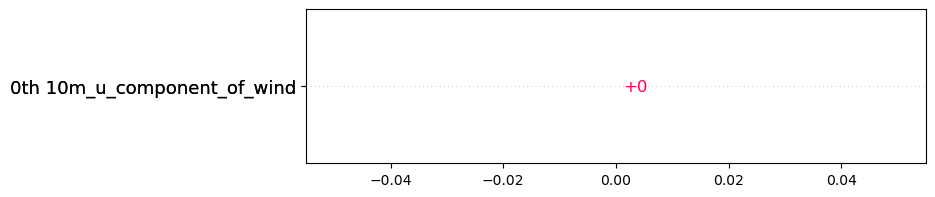

In [41]:
# use shapely to calculate the shap values
# Sample a subset of the data
sample_size = 1  # Adjust this to a size your machine can handle
X_sample = X_test_new.sample(sample_size, random_state=42)
new_sample = new.loc[X_sample.index]

# see the explanation for the model's predictions using SHAP
#explainer = shap.DeepExplainer(model, X_test_new)
explainer = shap.KernelExplainer(model, X_sample, feature_names=X_sample.columns)
shap_values = explainer(X_sample)

shap.plots.bar(shap_values[0])


TypeError: 'numpy.float64' object is not iterable

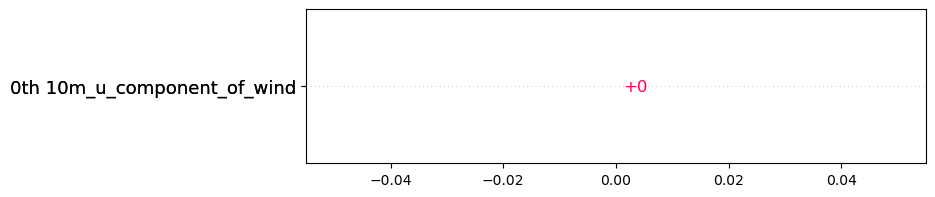

In [42]:
for i in range(0, len(new_name_of_variables)):
    shap.plots.bar(shap_values[i], max_display=10)


In [43]:
# Utilisation de DeepExplainer pour expliquer les prédictions du modèle
background = X_sample
explainer = shap.KernelExplainer(model, background)
shap_values = explainer.shap_values(X_sample)

# Utilisation de shap.plots.bar pour visualiser l'importance des features
shap.plots.bar(shap_values[0])

100%|██████████| 1/1 [00:00<00:00, 21.34it/s]


TypeError: The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!

In [44]:
shape_values(X_sample, npermutations=100)   

NameError: name 'shape_values' is not defined

In [45]:
# look at the shap values for the first prediction
print(np.asarray(shap_values[:].values).shape)
test = np.squeeze(np.asarray(shap_values[:].values))
test_m = np.mean(test, axis=0)
#shap.plots.waterfall(shap_values[])


AttributeError: 'list' object has no attribute 'values'

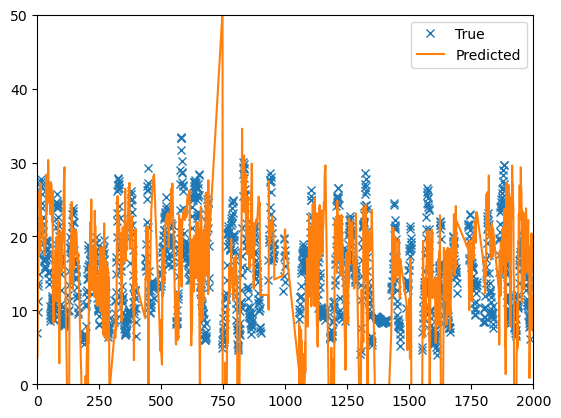

In [49]:
# plot the results 

plt.plot(np.squeeze(y_train_new), label='True', lw=0, marker='x')
plt.plot(new_train, label='Predicted')
plt.ylim(0, 50)
plt.xlim(0,2000)
plt.legend()
plt.show()

In [27]:
# feature importance 

result = permutation_importance(model, X_train_new, y_train_new, n_repeats=10, random_state=42, n_jobs=-1, scoring='neg_root_mean_squared_error')

100/100 [==============================] - 0s 1ms/step


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.